In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import plotly.express as px
from sklearn.decomposition import PCA
from pylab import *
import pylab as pl
%matplotlib inline
import seaborn as sns
from itertools import cycle
from sklearn.preprocessing import StandardScaler

In [2]:
#import iris dataset from sklearn
iris = datasets.load_iris()

In [3]:
#features in the iris dataset
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
#target in the iris dataset
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
#update X,y from iris dataset
X = iris.data
y = iris.target

In [6]:
#create dataframe using X,y
df = pd.DataFrame(X,columns=iris.feature_names)

#check header of the created dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
#append target into dataframe
df['target'] = iris.target

In [8]:
df.columns=['sepal_length', 'sepal_width', 'petal_lenth', 'petal_width', 'target']
df.head()

,sepal_length,sepal_width,petal_lenth,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


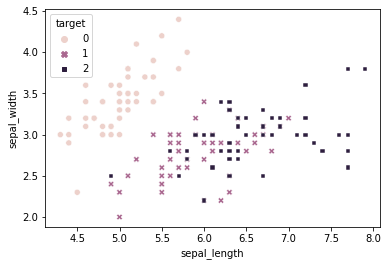

In [9]:
sns.scatterplot(x = df.sepal_length, y = df.sepal_width, hue = df.target, style = df.target);

### Standardize the Data

In [10]:
x_temp = df.iloc[:, 0:4].values 
y_temp = df.target.values 

x_temp = StandardScaler().fit_transform(x_temp)

### 2D representation of the data

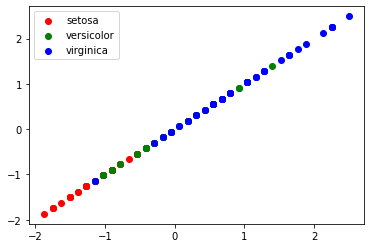

In [11]:
colors = cycle('rgb')
target_ids = range(len(iris.target_names))
pl.figure()
for i, c, label in zip(target_ids, colors, iris.target_names):
    pl.scatter(x_temp[iris.target == i, 0], x_temp[iris.target == i, 0],
        c=c, label=label)
pl.legend()
pl.show()

The three different types of Iris are still clustered pretty well.

### Compute the Eigenvectors and Eigenvalues

In [12]:
covariance_matrix = np.cov(x_temp.T)
print("Covariance matrix:\n", covariance_matrix)

Covariance matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [13]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvectors:\n", eigen_vectors, "\n")
print("Eigenvalues:\n", eigen_values)

Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]] 

Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]


## PCA for transformation into 2D data and visualization

In [14]:
#Apply PCA to transform iris dataset into 2D for visuallization
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(X)
principalDf2 = pd.DataFrame(data = principalComponents2, columns = ['principal component 1', 'principal component 2'])
finalDf2 = pd.concat([principalDf2, df[['target']]], axis = 1)
finalDf2.head(5)

,principal component 1,principal component 2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


In [15]:
#check the statistical values of the model transformed from 4D to 2D
print(f"components_ in the data transformed to 2D : \n{pca2.components_}\n")
print(f"explained_variance_ in the data transformed to 2D : \n{pca2.explained_variance_}\n")
print(f"score in the data transformed to 2D : \n{pca2.score(X)}")

components_ in the data transformed to 2D : 
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]

explained_variance_ in the data transformed to 2D : 
[4.22824171 0.24267075]

score in the data transformed to 2D : 
-2.699796510675664


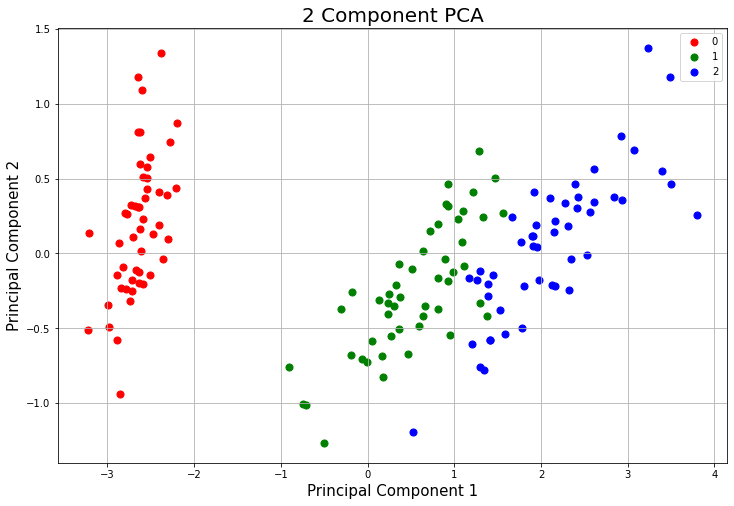

In [16]:
#Visualize the data into 2D
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


#targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf2['target'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 'principal component 1']
               , finalDf2.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [17]:
#Apply PCA to transform iris dataset into 2D for visuallization
pca2 = PCA(n_components=3)
principalComponents2 = pca2.fit_transform(X)
principalDf2 = pd.DataFrame(data = principalComponents2, columns = ['principal component 1', 'principal component 2', 'principal component 2'])
finalDf2 = pd.concat([principalDf2, df[['target']]], axis = 1)
finalDf2.head(5)

,principal component 1,principal component 2,principal component 2,target
0,-2.684126,0.319397,-0.027915,0
1,-2.714142,-0.177001,-0.210464,0
2,-2.888991,-0.144949,0.017900,0
3,-2.745343,-0.318299,0.031559,0
4,-2.728717,0.326755,0.090079,0


In [22]:
#check the statistical values of the model transformed from 4D to 2D
print(f"components_ in the data transformed to 2D : \n{pca2.components_}\n")
print(f"explained_variance_ in the data transformed to 2D : \n{pca2.explained_variance_}\n")
print(f"score in the data transformed to 2D : \n{pca2.score(X)}")

components_ in the data transformed to 2D : 
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]

explained_variance_ in the data transformed to 2D : 
[4.22824171 0.24267075 0.0782095 ]

score in the data transformed to 2D : 
-2.5328088437833913


In [23]:
fig = px.scatter_3d(
    principalComponents2, x=0, y=1, z=2, color=df['target'],
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()